# Case Study on Bike Sharing - Boom Bikes

BoomBikes aspires to understand the demand for shared bikes among the people to cater to the people's needs 
we want to understand the factors on which the demand for these shared bikes depends. Specifically, to understand 
the factors affecting the demand for these shared bikes in the American market. 

####  We want to know:
##### Which variables are significant in predicting them demand for shared bikes.
##### How well those variables describe the bike demands

### Reading and Understanding the Data

In [199]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [145]:
bs = pd.read_csv('/Users/nnelson/Downloads/day.csv')
bs.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [6]:
bs.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [7]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
bs.shape

(730, 16)

#### We have 730 records in total and have 16 different variables. 

#### We dont have any Null values

# 

## Visual Representation of the Data

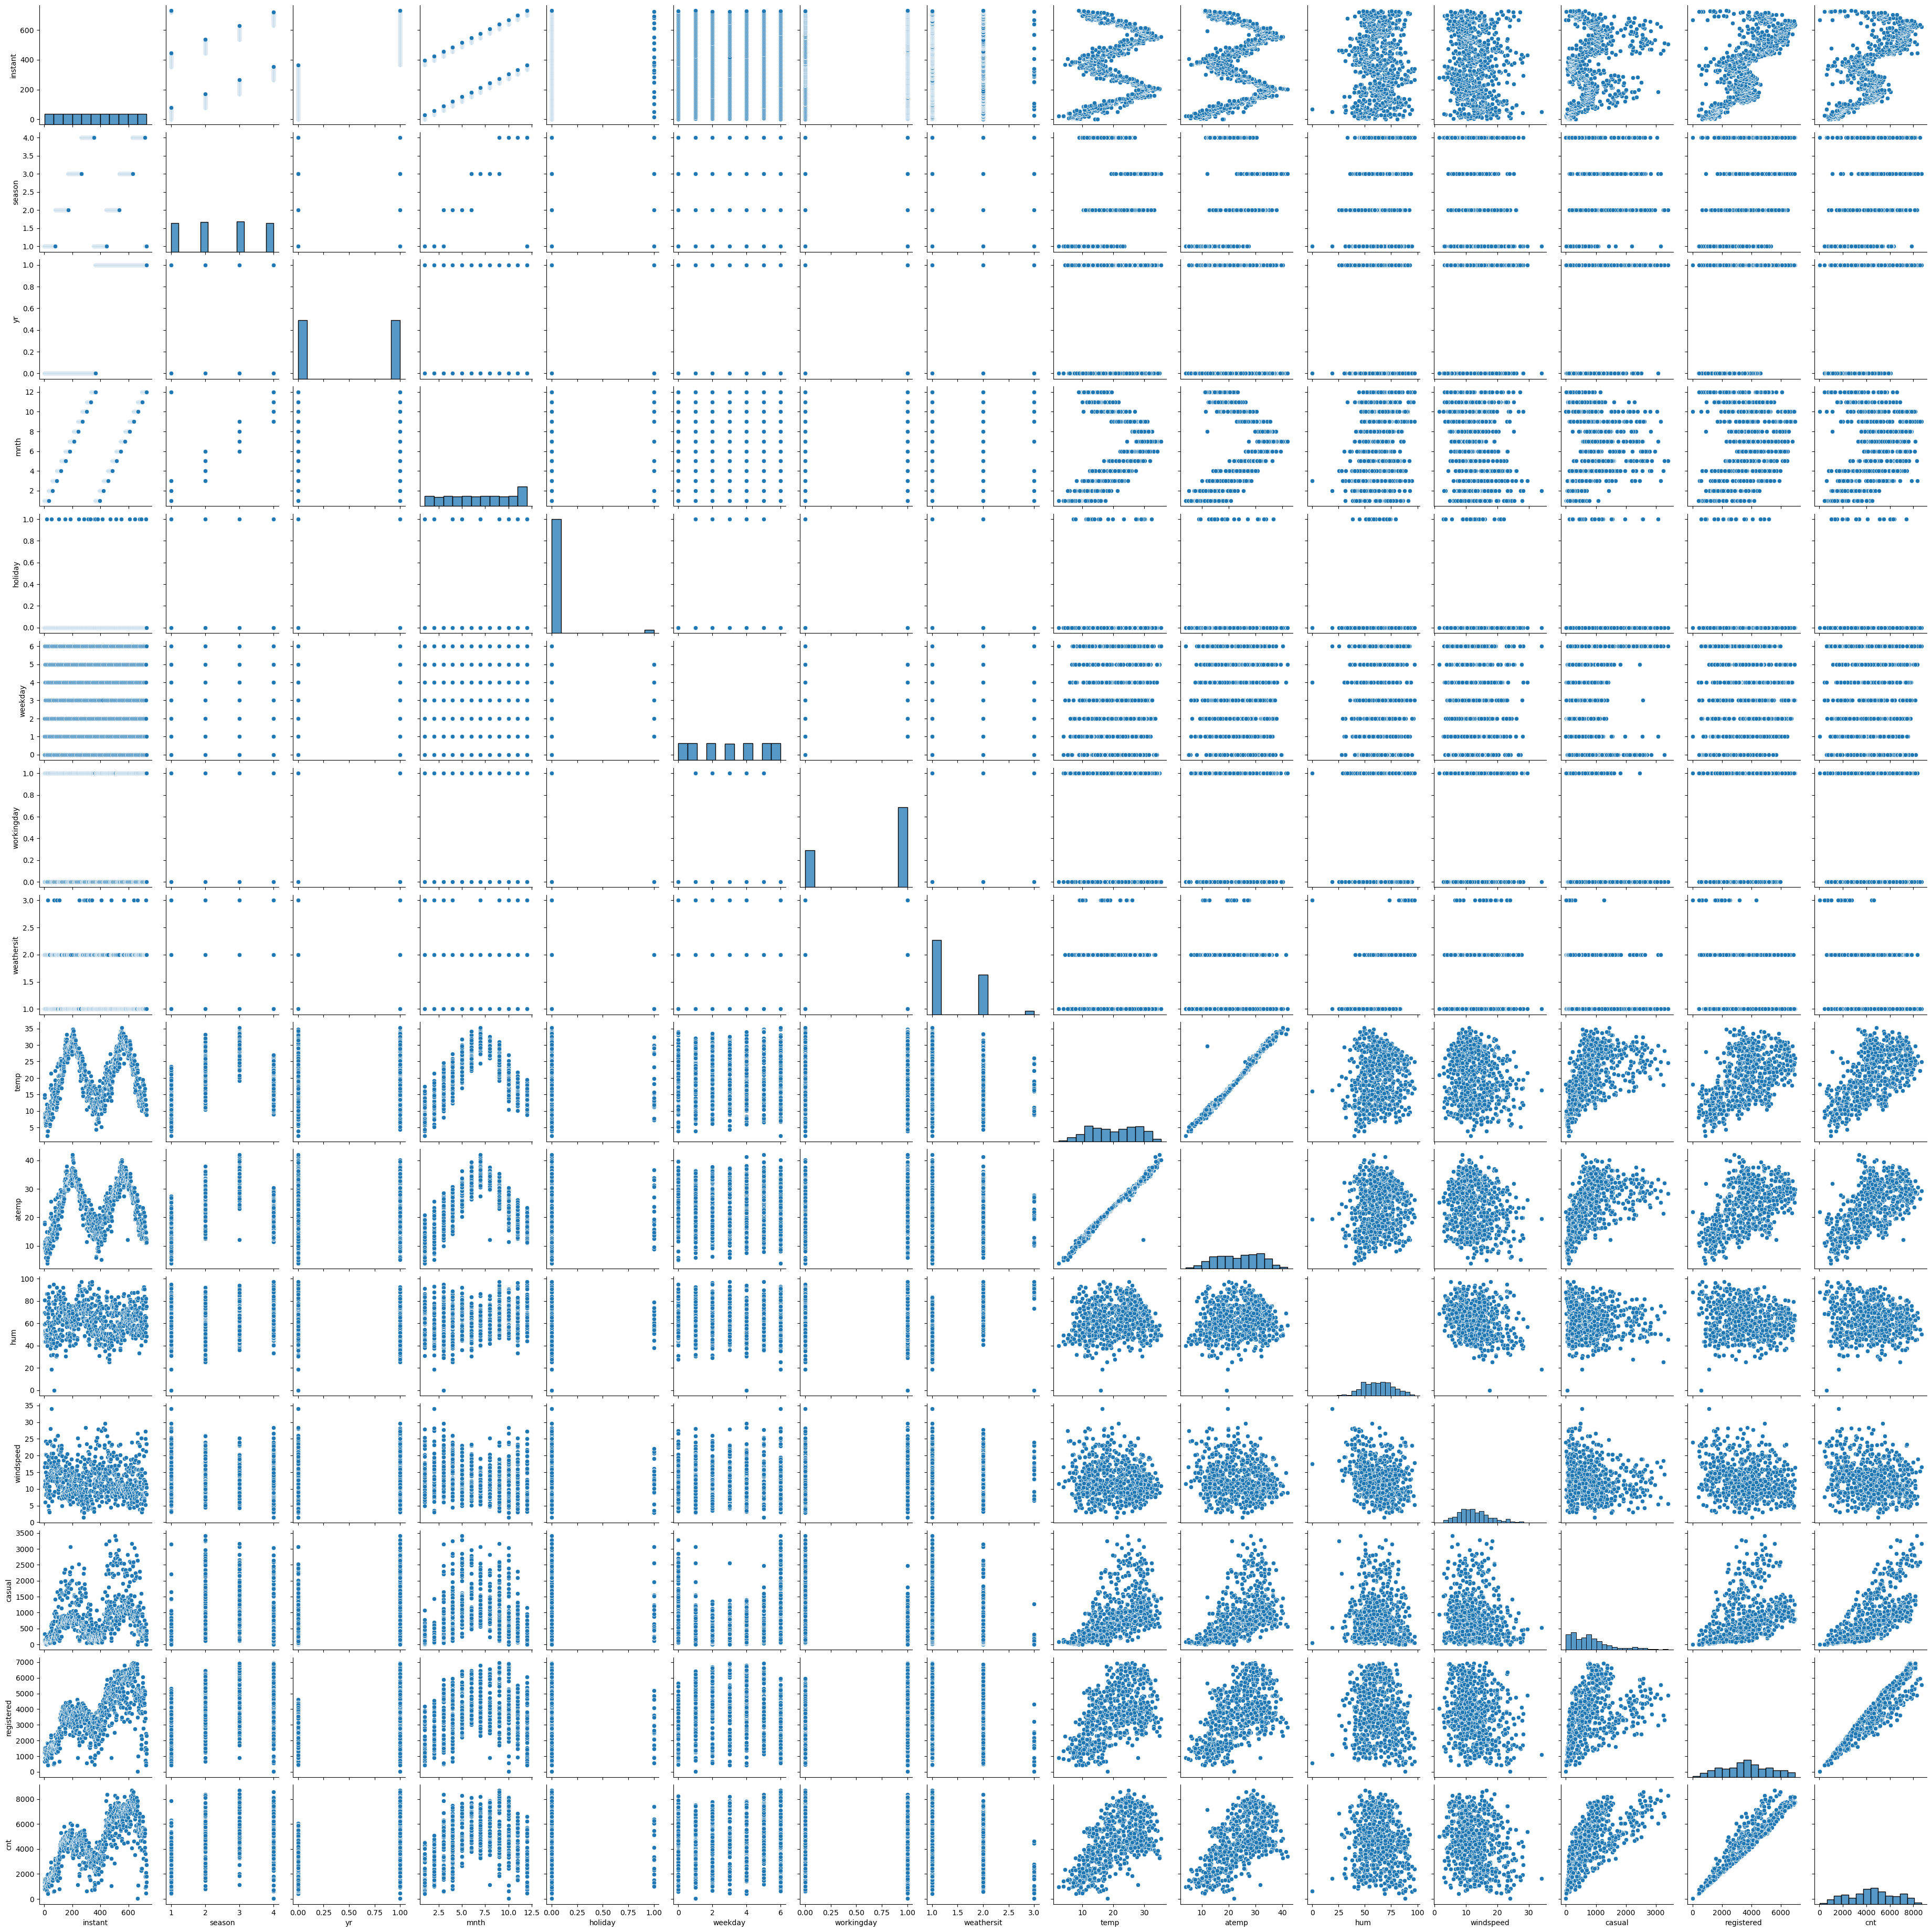

In [12]:
sns.pairplot(bs)
plt.show()

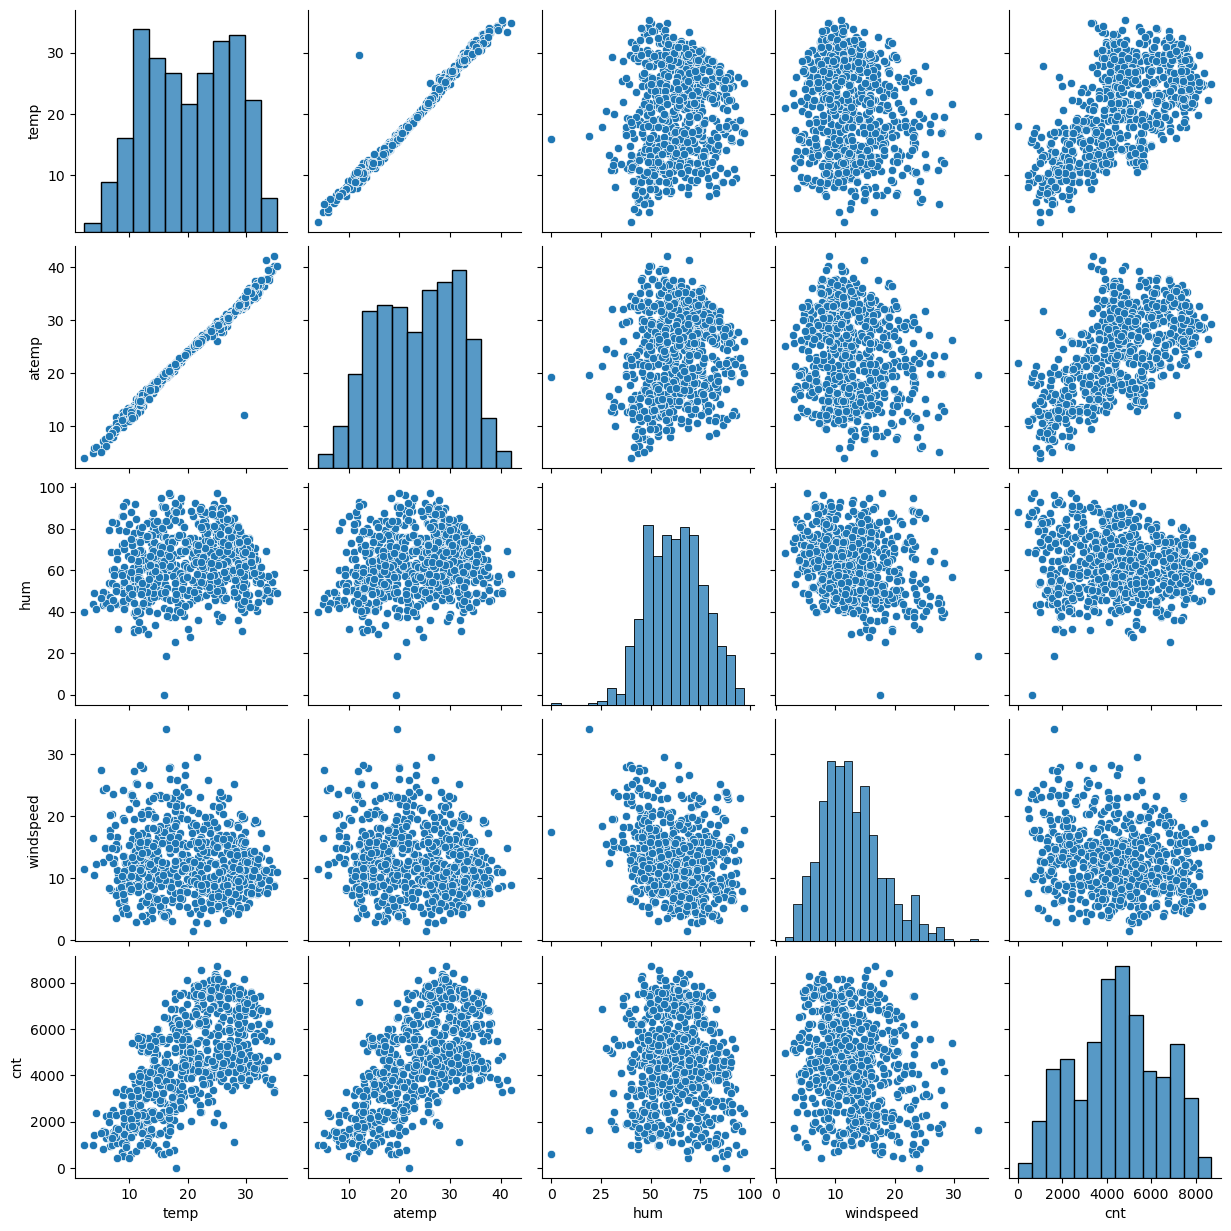

In [13]:
# The pairplot is not clear. It might give us some good information if we plot it 
# only on the continuos numerica variables

vrs = ['temp','atemp','hum','windspeed','cnt']

sns.pairplot(bs, vars = vrs)
plt.show()

##### From the above pairplot the only one showing some meaningful relationship is Temp with Cnt. 

# 

### Categorical Variables

##### Right now all the categorical variables also have numerical values and they look like continuos variables which theyare not. Hence, let us first input the proper values before understanding these categorical variables

In [146]:
bs = bs.replace({'season' : { 1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter' }})
bs.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018  spring   0     1        0        6           0   
1        2  02-01-2018  spring   0     1        0        0           0   
2        3  03-01-2018  spring   0     1        0        1           1   
3        4  04-01-2018  spring   0     1        0        2           1   
4        5  05-01-2018  spring   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [147]:
bs = bs.replace({'yr' : { 0 : 2018, 1 : 2019}})
bs = bs.replace({'mnth' : { 1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'}})
bs = bs.replace({'holiday' : { 0 : 'No', 1 : 'Yes' }})
bs = bs.replace({'weekday' : { 6 : 'monday', 0 : 'tuesday', 1 : 'wednesday', 2 : 'thursday', 3 : 'friday', 4 : 'saturday', 5 : 'sunday' }})
bs = bs.replace({'workingday' : { 0 : 'no', 1 : 'yes'}})
bs = bs.replace({'weathersit' : { 1 : 'clear', 2 : 'misty', 3 : 'snow', 4 : 'rainy'}})
bs.head(20)


instant      dteday  season    yr mnth holiday    weekday workingday  \
0         1  01-01-2018  spring  2018  Jan      No     monday         no   
1         2  02-01-2018  spring  2018  Jan      No    tuesday         no   
2         3  03-01-2018  spring  2018  Jan      No  wednesday        yes   
3         4  04-01-2018  spring  2018  Jan      No   thursday        yes   
4         5  05-01-2018  spring  2018  Jan      No     friday        yes   
5         6  06-01-2018  spring  2018  Jan      No   saturday        yes   
6         7  07-01-2018  spring  2018  Jan      No     sunday        yes   
7         8  08-01-2018  spring  2018  Jan      No     monday         no   
8         9  09-01-2018  spring  2018  Jan      No    tuesday         no   
9        10  10-01-2018  spring  2018  Jan      No  wednesday        yes   
10       11  11-01-2018  spring  2018  Jan      No   thursday        yes   
11       12  12-01-2018  spring  2018  Jan      No     friday        yes   
12       13  13-01-2018  spring  2018  Jan      No   saturday        yes   
13       14  14-01-2018  spring  2018  Jan      No     sunday        yes   
14       15  15-01-2018  spring  2018  Jan      No     monday         no   
15       16  16-01-2018  spring  2018  Jan      No    tuesday         no   
16       17  17-01-2018  spring  2018  Jan     Yes  wednesday         no   
17       18  18-01-2018  spring  2018  Jan      No   thursday        yes   
18       19  19-01-2018  spring  2018  Jan      No     friday        yes   
19       20  20-01-2018  spring  2018  Jan      No   saturday        yes   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0       misty  14.110847  18.18125  80.5833  10.749882     331         654   
1       misty  14.902598  17.68695  69.6087  16.652113     131         670   
2       clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3       clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4       clear   9.305237  11.46350  43.6957  12.522300      82        1518   
5       clear   8.378268  11.66045  51.8261   6.000868      88        1518   
6       misty   8.057402  10.44195  49.8696  11.304642     148        1362   
7       misty   6.765000   8.11270  53.5833  17.875868      68         891   
8       clear   5.671653   5.80875  43.4167  24.250650      54         768   
9       clear   6.184153   7.54440  48.2917  14.958889      41        1280   
10      misty   6.932731   9.57320  68.6364   8.182844      43        1220   
11      clear   7.081807   8.02365  59.9545  20.410009      25        1137   
12      clear   6.765000   7.54415  47.0417  20.167000      38        1368   
13      clear   6.595670   9.42065  53.7826   8.478716      54        1367   
14      misty   9.566653  12.40560  49.8750  10.583521     222        1026   
15      clear   9.498347  11.71085  48.3750  12.625011     251         953   
16      misty   7.209153   8.83855  53.7500  12.999139     117         883   
17      misty   8.883347  11.61665  86.1667   9.833925       9         674   
18      misty  11.979134  14.92110  74.1739  13.957239      78        1572   
19      misty  10.728347  12.75250  53.8333  13.125568      83        1844   

     cnt  
0    985  
1    801  
2   1349  
3   1562  
4   1600  
5   1606  
6   1510  
7    959  
8    822  
9   1321  
10  1263  
11  1162  
12  1406  
13  1421  
14  1248  
15  1204  
16  1000  
17   683  
18  1650  
19  1927

##### Now as we have switched the values of the categorical values to their actual values lets us see how they impact the business

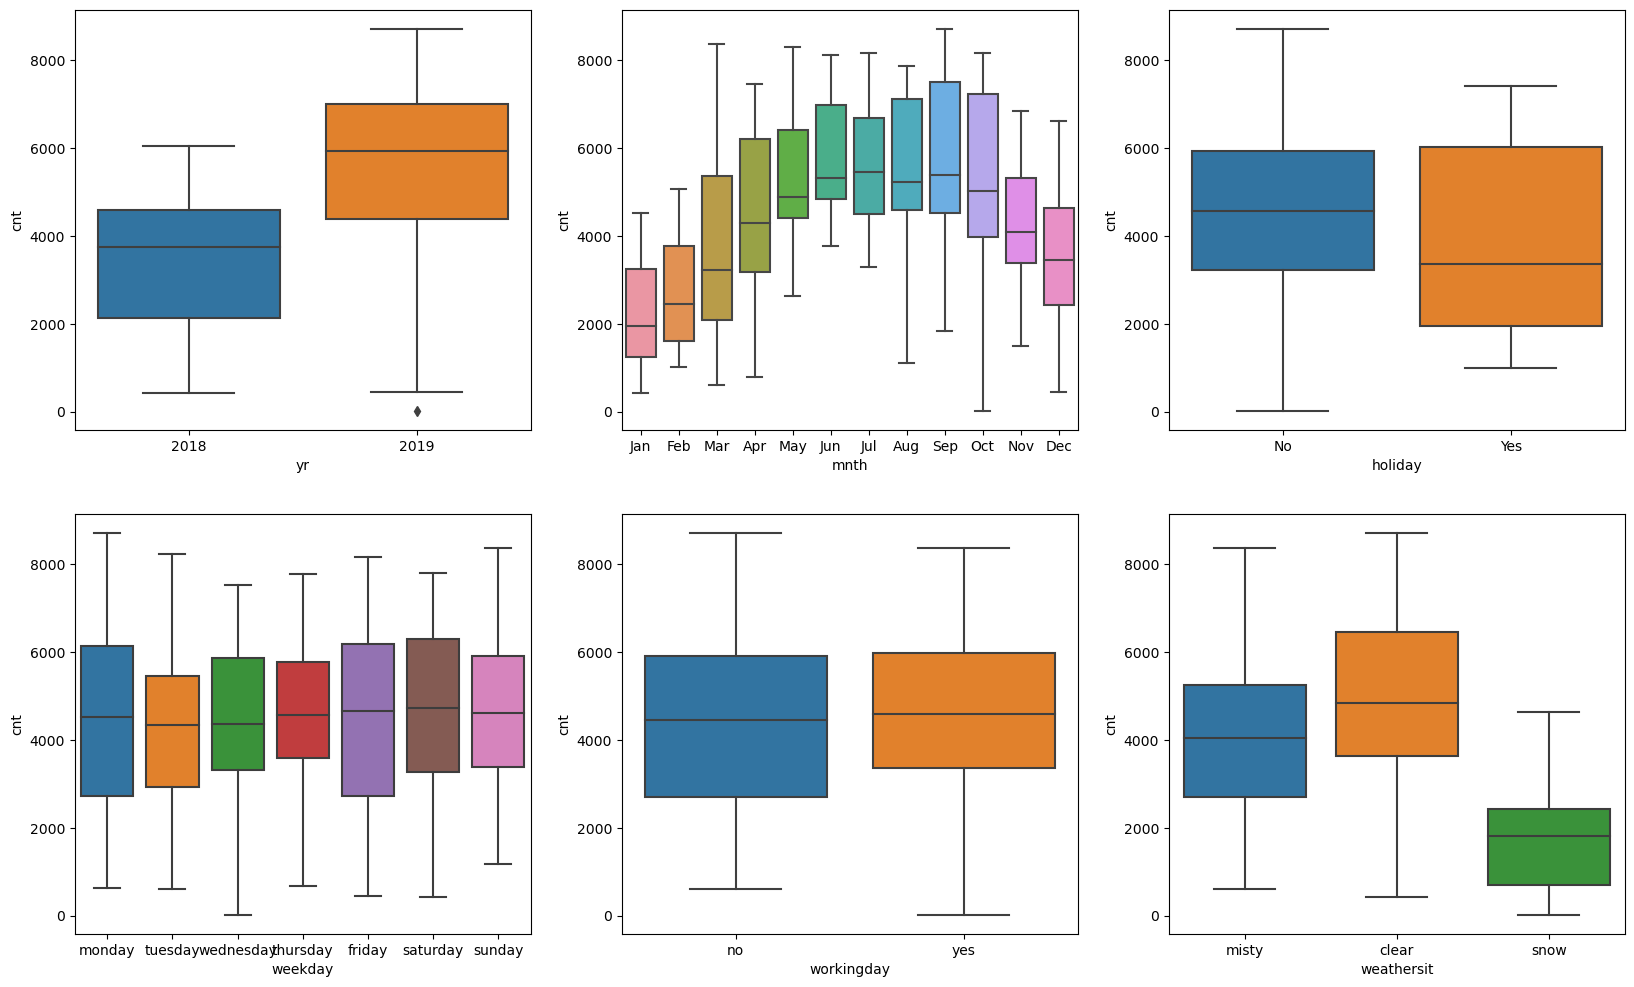

In [19]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bs)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bs)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bs)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bs)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bs)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bs)
plt.show()

In [20]:
bs.weathersit.value_counts()

clear    463
misty    246
snow      21
Name: weathersit, dtype: int64

### Key Observations from Categorical Data

##### Year : There is a significant increase in the number of Users in 2019 from 2018, Showing an upward tend.
##### Month : Summers see increased usage as compared to winter months.
##### Holiday :  Usage is more on Working Day as compared to holidays, which shows that a significant number of people use the service for commuting to work
##### Working Day : Although there is a slight increase in the usage on Working day but the different is not that significant
##### Weekday : We see that through out the week the bike usage is almost similar with slightly higher usage on Monday. Overall the difference between the days in very low
##### Weather Situation : As expected usage is high on clear days and lowest on snowy days. We dont have even a single record of bike rental on Rainy days.

# 

## Data Preparation

##### In our dataset we have 2 columns with values as 'Yes' or 'No' i.e 'Holiday' and 'Working Day' and also 'Year' have only 2 values '2018' and '2019'. For the Regression model we will convert the values into '0' and '1' where '0' would signify 'No' and '1' will signify 'Yes' and in the 'Year' Column we will use '0' for 2018 and '1' for '2019'



In [148]:
# List of variables to map

varlist =  ['holiday', 'workingday', 'yr']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0, 'Yes' : 1, 'No' : 0, 2018 : 0, 2019 : 1})

# Applying the function to the bike sharing dataset
bs[varlist] = bs[varlist].apply(binary_map)

In [53]:
bs.head(20)

instant      dteday  season  yr mnth  holiday    weekday  workingday  \
0         1  01-01-2018  spring   0  Jan        0     monday           0   
1         2  02-01-2018  spring   0  Jan        0    tuesday           0   
2         3  03-01-2018  spring   0  Jan        0  wednesday           1   
3         4  04-01-2018  spring   0  Jan        0   thursday           1   
4         5  05-01-2018  spring   0  Jan        0     friday           1   
5         6  06-01-2018  spring   0  Jan        0   saturday           1   
6         7  07-01-2018  spring   0  Jan        0     sunday           1   
7         8  08-01-2018  spring   0  Jan        0     monday           0   
8         9  09-01-2018  spring   0  Jan        0    tuesday           0   
9        10  10-01-2018  spring   0  Jan        0  wednesday           1   
10       11  11-01-2018  spring   0  Jan        0   thursday           1   
11       12  12-01-2018  spring   0  Jan        0     friday           1   
12       13  13-01-2018  spring   0  Jan        0   saturday           1   
13       14  14-01-2018  spring   0  Jan        0     sunday           1   
14       15  15-01-2018  spring   0  Jan        0     monday           0   
15       16  16-01-2018  spring   0  Jan        0    tuesday           0   
16       17  17-01-2018  spring   0  Jan        1  wednesday           0   
17       18  18-01-2018  spring   0  Jan        0   thursday           1   
18       19  19-01-2018  spring   0  Jan        0     friday           1   
19       20  20-01-2018  spring   0  Jan        0   saturday           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0       misty  14.110847  18.18125  80.5833  10.749882     331         654   
1       misty  14.902598  17.68695  69.6087  16.652113     131         670   
2       clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3       clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4       clear   9.305237  11.46350  43.6957  12.522300      82        1518   
5       clear   8.378268  11.66045  51.8261   6.000868      88        1518   
6       misty   8.057402  10.44195  49.8696  11.304642     148        1362   
7       misty   6.765000   8.11270  53.5833  17.875868      68         891   
8       clear   5.671653   5.80875  43.4167  24.250650      54         768   
9       clear   6.184153   7.54440  48.2917  14.958889      41        1280   
10      misty   6.932731   9.57320  68.6364   8.182844      43        1220   
11      clear   7.081807   8.02365  59.9545  20.410009      25        1137   
12      clear   6.765000   7.54415  47.0417  20.167000      38        1368   
13      clear   6.595670   9.42065  53.7826   8.478716      54        1367   
14      misty   9.566653  12.40560  49.8750  10.583521     222        1026   
15      clear   9.498347  11.71085  48.3750  12.625011     251         953   
16      misty   7.209153   8.83855  53.7500  12.999139     117         883   
17      misty   8.883347  11.61665  86.1667   9.833925       9         674   
18      misty  11.979134  14.92110  74.1739  13.957239      78        1572   
19      misty  10.728347  12.75250  53.8333  13.125568      83        1844   

     cnt  
0    985  
1    801  
2   1349  
3   1562  
4   1600  
5   1606  
6   1510  
7    959  
8    822  
9   1321  
10  1263  
11  1162  
12  1406  
13  1421  
14  1248  
15  1204  
16  1000  
17   683  
18  1650  
19  1927

In [138]:
bs['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

# 

### Creating Dummy Variables

##### The variables 'season', 'month', 'weekday', 'weathersit' has more than 3 values. We need to convert these values into integer using dummy variables.


In [149]:
# Get the dummy variables and store it in new variables

season_dum = pd.get_dummies(bs['season'], drop_first = True)
mnth_dum = pd.get_dummies(bs['mnth'], drop_first = True)
weekday_dum = pd.get_dummies(bs['weekday'], drop_first = True)
weathersit_dum = pd.get_dummies(bs['weathersit'], drop_first = True)

mnth_dum.head()

Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    1    0    0    0    0    0    0    0

In [140]:
weekday_dum.head()

monday  saturday  sunday  thursday  tuesday  wednesday
0       1         0       0         0        0          0
1       0         0       0         0        1          0
2       0         0       0         0        0          1
3       0         0       0         1        0          0
4       0         0       0         0        0          0

##### We have created dummy variables and have dropped one value as we will use n-1 dummy values for variable with n values


In [150]:
# Add the dummy variables to the original bs dataframe

bs = pd.concat([bs, season_dum, mnth_dum, weekday_dum, weathersit_dum], axis = 1)
bs.head()

instant      dteday  season  yr mnth  holiday    weekday  workingday  \
0        1  01-01-2018  spring   0  Jan        0     monday           0   
1        2  02-01-2018  spring   0  Jan        0    tuesday           0   
2        3  03-01-2018  spring   0  Jan        0  wednesday           1   
3        4  04-01-2018  spring   0  Jan        0   thursday           1   
4        5  05-01-2018  spring   0  Jan        0     friday           1   

  weathersit       temp  ...  Oct  Sep  monday  saturday  sunday  thursday  \
0      misty  14.110847  ...    0    0       1         0       0         0   
1      misty  14.902598  ...    0    0       0         0       0         0   
2      clear   8.050924  ...    0    0       0         0       0         0   
3      clear   8.200000  ...    0    0       0         0       0         1   
4      clear   9.305237  ...    0    0       0         0       0         0   

   tuesday  wednesday  misty  snow  
0        0          0      1     0  
1        1          0      1     0  
2        0          1      0     0  
3        0          0      0     0  
4        0          0      0     0  

[5 rows x 38 columns]

In [81]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
 16  spring      730 non-null    uint8  
 17  summer      730 non-null    uint8  
 18  winter      730 non-null    uint8  
 19  Aug         730 non-null    u

In [151]:
# Drop the original Variables as we have now created the dummy variables

bs.drop(['season','mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   yr          730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   casual      730 non-null    int64  
 10  registered  730 non-null    int64  
 11  cnt         730 non-null    int64  
 12  spring      730 non-null    uint8  
 13  summer      730 non-null    uint8  
 14  winter      730 non-null    uint8  
 15  Aug         730 non-null    uint8  
 16  Dec         730 non-null    uint8  
 17  Feb         730 non-null    uint8  
 18  Jan         730 non-null    uint8  
 19  Jul         730 non-null    u

# 

## Let us now split the Data into Training Set and Testing Set

#### Before splitting the data we will remove some of the columns which we feel might not be useful while creating the regression model


In [238]:
# We are removing these columns cause either the information these provide is already provided by other variables

bsnew = bs.drop(['dteday', 'casual', 'registered', 'atemp'], axis = 1)


In [202]:
# splitting the data into Training set and Testing Set

bsnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   yr          730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   temp        730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  Aug         730 non-null    uint8  
 12  Dec         730 non-null    uint8  
 13  Feb         730 non-null    uint8  
 14  Jan         730 non-null    uint8  
 15  Jul         730 non-null    uint8  
 16  Jun         730 non-null    uint8  
 17  Mar         730 non-null    uint8  
 18  May         730 non-null    uint8  
 19  Nov         730 non-null    u

In [203]:
bsnew.head()

instant  yr  holiday  workingday       temp      hum  windspeed   cnt  \
0        1   0        0           0  14.110847  80.5833  10.749882   985   
1        2   0        0           0  14.902598  69.6087  16.652113   801   
2        3   0        0           1   8.050924  43.7273  16.636703  1349   
3        4   0        0           1   8.200000  59.0435  10.739832  1562   
4        5   0        0           1   9.305237  43.6957  12.522300  1600   

   spring  summer  ...  Oct  Sep  monday  saturday  sunday  thursday  tuesday  \
0       1       0  ...    0    0       1         0       0         0        0   
1       1       0  ...    0    0       0         0       0         0        1   
2       1       0  ...    0    0       0         0       0         0        0   
3       1       0  ...    0    0       0         0       0         1        0   
4       1       0  ...    0    0       0         0       0         0        0   

   wednesday  misty  snow  
0          0      1     0  
1          0      1     0  
2          1      0     0  
3          0      0     0  
4          0      0     0  

[5 rows x 30 columns]

In [239]:
# Splitting the dataset into Training set and Testing Set at the ration of 70:30

np.random.seed(0)
bs_train, bs_test = train_test_split(bsnew, train_size = 0.7, test_size = 0.3, random_state = 100)

In [205]:
bs_train.head()

instant  yr  holiday  workingday       temp      hum  windspeed   cnt  \
653      654   1        0           1  19.201653  55.8333  12.208807  7534   
576      577   1        0           1  29.246653  70.4167  11.083475  7216   
426      427   1        0           0  16.980847  62.1250  10.792293  4066   
728      729   1        0           0  10.489153  48.3333  23.500518  1796   
482      483   1        0           0  15.443347  48.9583   8.708325  4220   

     spring  summer  ...  Oct  Sep  monday  saturday  sunday  thursday  \
653       0       0  ...    1    0       0         0       0         1   
576       0       0  ...    0    0       0         0       0         1   
426       1       0  ...    0    0       1         0       0         0   
728       1       0  ...    0    0       0         0       0         0   
482       0       1  ...    0    0       1         0       0         0   

     tuesday  wednesday  misty  snow  
653        0          0      0     0  
576        0          0      0     0  
426        0          0      1     0  
728        1          0      0     0  
482        0          0      1     0  

[5 rows x 30 columns]

In [206]:
bs_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     510 non-null    int64  
 1   yr          510 non-null    int64  
 2   holiday     510 non-null    int64  
 3   workingday  510 non-null    int64  
 4   temp        510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   cnt         510 non-null    int64  
 8   spring      510 non-null    uint8  
 9   summer      510 non-null    uint8  
 10  winter      510 non-null    uint8  
 11  Aug         510 non-null    uint8  
 12  Dec         510 non-null    uint8  
 13  Feb         510 non-null    uint8  
 14  Jan         510 non-null    uint8  
 15  Jul         510 non-null    uint8  
 16  Jun         510 non-null    uint8  
 17  Mar         510 non-null    uint8  
 18  May         510 non-null    uint8  
 19  Nov         510 non-null    

## Rescaling the Features


In the dataset the values of Temp , Humidity and Cnt are all in different scales and in order to create a proper model we need to bring then all under the same scaling.

We will use the Min-Max scaling


In [207]:
scaler = MinMaxScaler()

In [208]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

bs_train[num_vars] = scaler.fit_transform(bs_train[num_vars])

In [209]:
bs_train.head()

instant  yr  holiday  workingday      temp       hum  windspeed  \
653      654   1        0           1  0.509887  0.575354   0.300794   
576      577   1        0           1  0.815169  0.725633   0.264686   
426      427   1        0           0  0.442393  0.640189   0.255342   
728      729   1        0           0  0.245101  0.498067   0.663106   
482      483   1        0           0  0.395666  0.504508   0.188475   

          cnt  spring  summer  ...  Oct  Sep  monday  saturday  sunday  \
653  0.864243       0       0  ...    1    0       0         0       0   
576  0.827658       0       0  ...    0    0       0         0       0   
426  0.465255       1       0  ...    0    0       1         0       0   
728  0.204096       1       0  ...    0    0       0         0       0   
482  0.482973       0       1  ...    0    0       1         0       0   

     thursday  tuesday  wednesday  misty  snow  
653         1        0          0      0     0  
576         1        0          0      0     0  
426         0        0          0      1     0  
728         0        1          0      0     0  
482         0        0          0      1     0  

[5 rows x 30 columns]

Now all our values are within the range of 0 to 1

In [210]:
bs_train.describe()

instant          yr     holiday  workingday        temp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean   368.941176    0.507843    0.025490    0.676471    0.537262    0.650369   
std    209.868619    0.500429    0.157763    0.468282    0.225844    0.145882   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    187.250000    0.000000    0.000000    0.000000    0.339853    0.538643   
50%    373.000000    1.000000    0.000000    1.000000    0.540519    0.653714   
75%    553.750000    1.000000    0.000000    1.000000    0.735215    0.754830   
max    729.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt      spring      summer  ...         Oct  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320768    0.513620    0.243137    0.245098  ...    0.086275   
std      0.169797    0.224593    0.429398    0.430568  ...    0.281045   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sep      monday    saturday      sunday    thursday     tuesday  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.080392    0.154902    0.133333    0.127451    0.131373    0.143137   
std      0.272166    0.362166    0.340268    0.333805    0.338139    0.350557   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        wednesday       misty        snow  
count  510.000000  510.000000  510.000000  
mean     0.150980    0.343137    0.029412  
std      0.358381    0.475223    0.169124  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

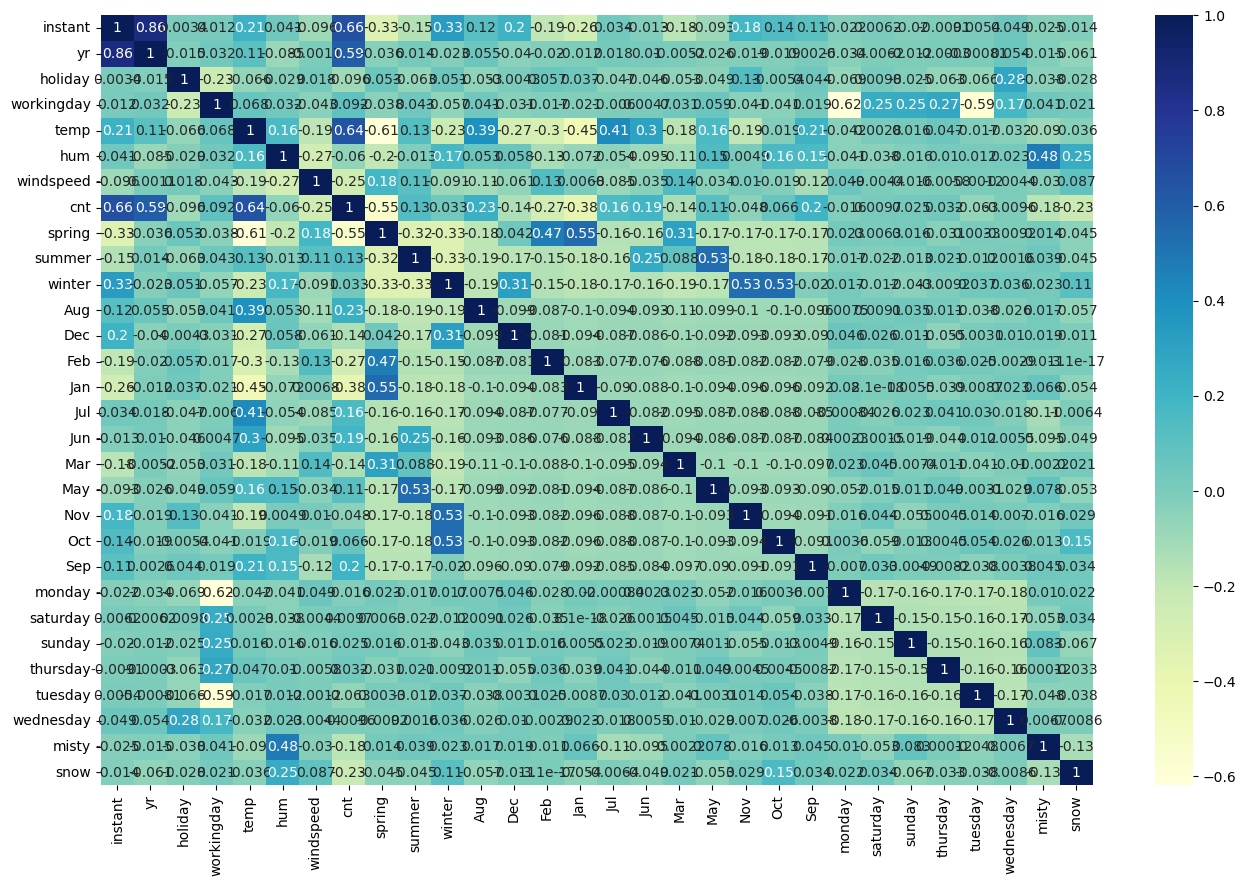

In [211]:
# correlation coefficients of variables to see which are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bs_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

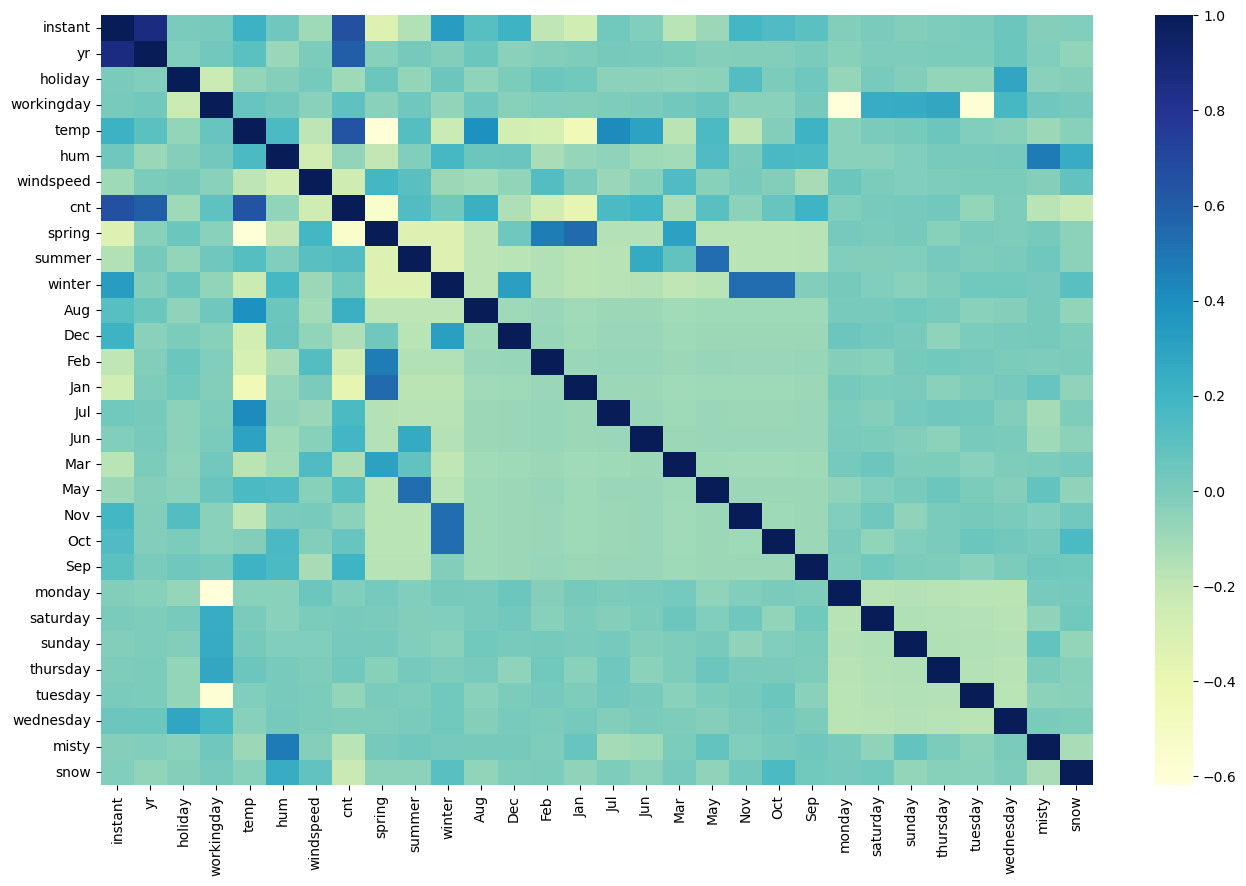

In [212]:
plt.figure(figsize = (16, 10))
sns.heatmap(bs_train.corr(), cmap="YlGnBu")
plt.show()

We can see high corrrelation between some of the variables like misty-hum, cnt-yr, cnt-temp, winter - nov/oct and so on 

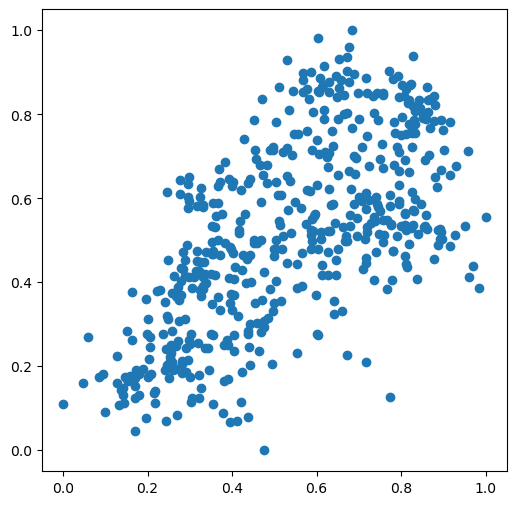

In [213]:
plt.figure(figsize=[6,6])
plt.scatter(bs_train.temp, bs_train.cnt)
plt.show()

We can see from the above figure a very good correlation between Temp and cnt

# 

## Divide into X and Y sets for the model building

In [214]:
y_train = bs_train.pop('cnt')
X_train = bs_train

## Model Building

we will use the LinearRegression function from SciKit Learn for its compatibility with RFE


In [166]:
# Running RFE taking top 20 variables out of 29 into account

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [167]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('instant', False, 10),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 8),
 ('Mar', False, 9),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 5),
 ('Sep', True, 1),
 ('monday', True, 1),
 ('saturday', False, 7),
 ('sunday', False, 6),
 ('thursday', False, 4),
 ('tuesday', False, 2),
 ('wednesday', False, 3),
 ('misty', True, 1),
 ('snow', True, 1)]

In [168]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'May', 'Nov',
       'Sep', 'monday', 'misty', 'snow'],
      dtype='object')

In [169]:
X_train.columns[~rfe.support_]

Index(['instant', 'Jun', 'Mar', 'Oct', 'saturday', 'sunday', 'thursday',
       'tuesday', 'wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [170]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [171]:
# Adding a constant variable 

X_train_rfe = sm.add_constant(X_train_rfe)

In [172]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [173]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.2
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          1.62e-188
Time:                        14:07:28   Log-Likelihood:                 526.45
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     489   BIC:                            -922.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2904      0.041      7.163      0.0

The variable 'Aug' with a very high 'p' value is insignificant in presence of other variables. We will drop 'Aug'

In [177]:
X_train_1 = X_train_rfe.drop(["const"], axis = 1)

In [178]:
# Calculate the VIFs

vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4          hum  33.37
3         temp  22.20
6       spring   7.44
8       winter   5.99
7       summer   5.89
2   workingday   5.45
5    windspeed   4.94
9          Aug   3.15
13         Jul   2.78
12         Jan   2.42
18       misty   2.33
16         Sep   2.17
0           yr   2.11
17      monday   2.04
11         Feb   1.93
15         Nov   1.87
10         Dec   1.69
14         May   1.60
19        snow   1.30
1      holiday   1.21

In [179]:
# Let us first drop 'Aug' as t carries a very high 'p' value

X_train_1 = X_train_rfe.drop(["Aug"], axis = 1)

X_train_1 = sm.add_constant(X_train_1)
lm = sm.OLS(y_train,X_train_1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          1.59e-189
Time:                        14:15:13   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2985      0.038      7.774      0.0

In [180]:
X_train_2 = X_train_1.drop(["May"], axis = 1)

X_train_2 = sm.add_constant(X_train_2)
lm = sm.OLS(y_train,X_train_2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          3.55e-190
Time:                        14:16:07   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2873      0.038      7.630      0.0

In [181]:
X_train_3 = X_train_2.drop(["Feb"], axis = 1)

X_train_3 = sm.add_constant(X_train_3)
lm = sm.OLS(y_train,X_train_3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          9.55e-191
Time:                        14:17:06   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2759      0.037      7.452      0.0

In [182]:
X_train_4 = X_train_3.drop(["holiday"], axis = 1)

X_train_4 = sm.add_constant(X_train_4)
lm = sm.OLS(y_train,X_train_4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          4.53e-191
Time:                        14:19:40   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2694      0.037      7.286      0.0

In [183]:
X_train_5 = X_train_4.drop(["Dec"], axis = 1)

X_train_5 = sm.add_constant(X_train_5)
lm = sm.OLS(y_train,X_train_5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.8
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          5.74e-191
Time:                        14:20:55   Log-Likelihood:                 518.94
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     494   BIC:                            -938.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2511      0.036      6.906      0.0

In [184]:
X_train_6 = X_train_5.drop(["Nov"], axis = 1)

X_train_6 = sm.add_constant(X_train_6)
lm = sm.OLS(y_train,X_train_6).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.9
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          1.70e-191
Time:                        14:22:00   Log-Likelihood:                 517.44
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2418      0.036      6.715      0.0

In [186]:
X_train_7 = X_train_6.drop(["Jan"], axis = 1)

X_train_7 = sm.add_constant(X_train_7)
lm = sm.OLS(y_train,X_train_7).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          8.51e-192
Time:                        17:02:42   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2298      0.036      6.451      0.0

In [187]:
X_train_8 = X_train_7.drop(["spring"], axis = 1)

X_train_8 = sm.add_constant(X_train_8)
lm = sm.OLS(y_train,X_train_8).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          2.26e-191
Time:                        17:03:32   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1705      0.028      5.991      0.0

In [188]:
## Calculating the VIF

X_train_8 = X_train_7.drop(["const"], axis = 1)

vif = pd.DataFrame()
X = X_train_8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3          hum  28.41
2         temp  16.87
1   workingday   4.71
4    windspeed   4.70
5       spring   4.18
7       winter   3.40
6       summer   2.83
11       misty   2.28
0           yr   2.08
10      monday   1.84
8          Jul   1.58
9          Sep   1.38
12        snow   1.24

In [189]:
# Dropping 'hum' as the VIF is too high

X_train_9 = X_train_8.drop(["hum"], axis = 1)

vif = pd.DataFrame()
X = X_train_9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2         temp  6.73
1   workingday  4.65
3    windspeed  4.64
4       spring  2.38
5       summer  2.31
0           yr  2.07
6       winter  1.92
9       monday  1.83
7          Jul  1.58
10       misty  1.56
8          Sep  1.34
11        snow  1.08

In [192]:
X_train_9 = sm.add_constant(X_train_9)
lm = sm.OLS(y_train,X_train_9).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          3.28e-189
Time:                        17:47:54   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1493      0.031      4.886      0.0

In [243]:
X_train_9 = X_train_9.drop(["const"], axis = 1)

#### This model looks good

#### R Squared : 0.84
#### p values are all close to Zero
#### Prob (F-statistic) is Zero

#### VIF values of all the variables are also less than 10

# 

### Residual Analysis of the train data

To check if the error terms are also normally distributed we will plot the histogram of the error terms and see what it looks like.

In [196]:
y_train_cnt = lm.predict(X_train_9)

Text(0.5, 0, 'Errors')

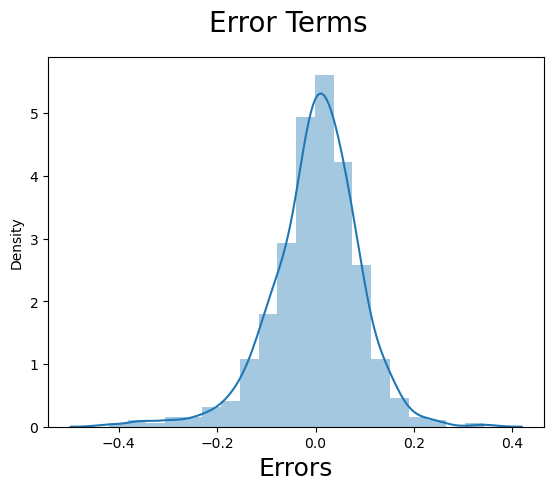

In [200]:
# histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

##### As seen in the histogram the error terms are normally distributed

# 

### Making Predictions

In [240]:
# Applying scaling on the test sets

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

bs_test[num_vars] = scaler.transform(bs_test[num_vars])


#### Dividing into X_test and y_test

In [241]:
y_test = bs_test.pop('cnt')
X_test = bs_test

In [244]:
# Using our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_9.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [245]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

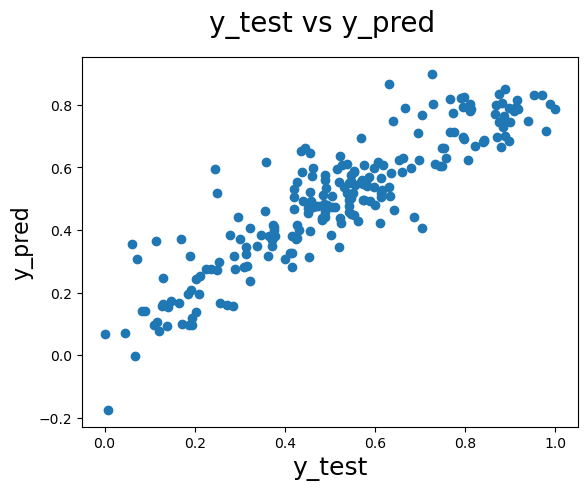

In [246]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Overall our model looks good.

The equation of our best fitted line is as follows

#### count = 0.2338 X yr + 0.055 X workingday + 0.4925 X temp - 0.150 X windspeed -0.0662 X spring +0.0469 X summer + 0.0851 X winter - 0.0489 X Jul + 0.0738 X Sep + 0.0666 X monday - 0.0830 X misty - 0.2892 X snow

# 

In [248]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7976577073801356

# 